https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/use-tabular-data/


# Lesson 3. Use Tabular Data for Earth Data Science

### Earth and Environmental Data That Are Stored In Text File Format

In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Open the .csv file using Pandas
avg_monthly_precip = pd.read_csv("https://ndownloader.figshare.com/files/12710618")

# View the data
avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


In [3]:
avg_monthly_precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   months   12 non-null     object 
 1   precip   12 non-null     float64
 2   seasons  12 non-null     object 
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


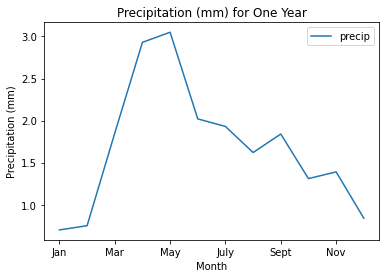

In [4]:
# Plot the data as a line plot
f, ax = plt.subplots()
avg_monthly_precip.plot(x="months",
                        y="precip",
                        title="Precipitation (mm) for One Year",
                        ax=ax)
ax.set(xlabel='Month',
       ylabel='Precipitation (mm)')
plt.show()


### Challenge 2
Plot the same data as a bar plot

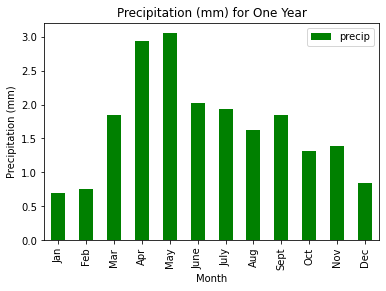

In [5]:
# Plot the data as a bar plot
f, ax = plt.subplots()
avg_monthly_precip.plot(x="months",
                        y="precip",
                        title="Precipitation (mm) for One Year",
                        ax=ax,
                        kind="bar",
                        color="green")
ax.set(xlabel='Month',
       ylabel='Precipitation (mm)')
plt.show()


### Cleaning Tabular Text Files

Dataset: Temperature data for Miami, Florida  
Source:  NOAA National Centers for Environmental information, Climate at a Glance: City Time Series

Goal: Examine file, remove metadata, handle missing values

In [6]:
# Open temperature data for Miami, Florida
miami_temp_url = "https://www.ncdc.noaa.gov/cag/city/time-series/USW00012839-tmax-12-12-1895-2020.csv"

miami_temp = pd.read_csv(miami_temp_url)
miami_temp


,Miami,Florida,Maximum Temperature,January-December
0,Units: Degrees Fahrenheit,NaN,NaN,NaN
1,Base Period: 1901-2000,NaN,NaN,NaN
2,Missing: -99,NaN,NaN,NaN
3,Date,Value,Anomaly,NaN
4,194812,83.7,1.0,NaN
...,...,...,...,...
72,201612,84.5,1.8,NaN
73,201712,85.0,2.3,NaN
74,201812,84.4,1.7,NaN
75,201912,85.9,3.2,NaN


In [7]:
# Open the Miami data skipping the metadata rows and setting no data values
miami_temp = pd.read_csv(miami_temp_url,
                         skiprows=4,
                         na_values=-99)

# View the first 5 rows of the data
print(miami_temp.head())
print("\nMin date:", miami_temp["Date"].min(), "\nMax date: ", miami_temp["Date"].max())


     Date  Value  Anomaly
0  194812   83.7      1.0
1  194912   83.1      0.4
2  195012   82.3     -0.4
3  195112   82.7      0.0
4  195212   83.3      0.6

Min date: 194812 
Max date:  202012


### Challenge 3

Goal: Plot the data

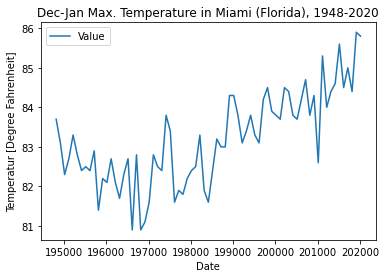

In [8]:
# Plot the data
miami_temp.plot(x="Date", 
                y="Value",
                title="Dec-Jan Max. Temperature in Miami (Florida), 1948-2020",
                xlabel="Date",
                ylabel="Temperatur [Degree Fahrenheit]")

plt.show()

### Challenge 4

Goal: Make the same plot for a different city

Dataset: Temperature data for Seattle, Washington  
Source: NOAA National Centers for Environmental information, Climate at a Glance: City Time Series

In [9]:
# Get the data
seattle_temp = pd.read_csv("https://www.ncdc.noaa.gov/cag/city/time-series/USW00013895-tmax-1-5-1895-2020.csv",
                           skiprows=4,
                           na_values=-99)

# First overview
print(seattle_temp.head())
print("\nMin date:", miami_temp["Date"].min(), "\nmax date: ", miami_temp["Date"].max())

     Date  Value  Anomaly
0  194805   88.5      3.2
1  194905   88.4      3.1
2  195005   87.8      2.5
3  195105   87.4      2.1
4  195205   86.1      0.8

Min date: 194812 
max date:  202012


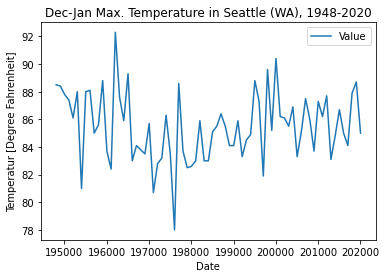

In [10]:
# Plot the data
seattle_temp.plot(x="Date", 
                y="Value",
                title="Dec-Jan Max. Temperature in Seattle (WA), 1948-2020",
                xlabel="Date",
                ylabel="Temperatur [Degree Fahrenheit]")

plt.show()

### Challenge 5

Goal: Read data from another dataset and apply the same steps.

Dataset: CO2 emissions for a field site in Barrow, Alaska
Source: NOAA

In [11]:
# Additional import
import urllib.request

# Download greenhouse gas CO2 data
greenhouse_gas_url = "ftp://aftp.cmdl.noaa.gov/data/trace_gases/co2/in-situ/surface/brw/co2_brw_surface-insitu_1_ccgg_MonthlyData.txt"
filename = "co2-emissions-barrow.csv"

# Protect against downloading again
if not os.path.isfile(os.path.join("data", filename)):
    urllib.request.urlretrieve(url=greenhouse_gas_url,
                               filename=filename)


In [12]:
# Read file
co2_emissions = pd.read_csv("./data/co2-emissions-barrow.csv",
                            skiprows=148,
                            delimiter=" ",
                            na_values={"time_decimal" : -999.99, 
                                       "value" : -999.99}
                           )
# Examine data
co2_emissions.head()

,site_code,year,month,day,hour,minute,second,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag
0,BRW,1973,1,1,0,0,0,1973.000000,NaN,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..
1,BRW,1973,2,1,0,0,0,1973.084932,NaN,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..
2,BRW,1973,3,1,0,0,0,1973.161644,NaN,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..
3,BRW,1973,4,1,0,0,0,1973.246575,NaN,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..
4,BRW,1973,5,1,0,0,0,1973.328767,NaN,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..


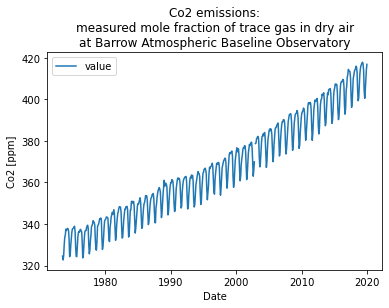

In [13]:
# Plot data
co2_emissions.plot(x="time_decimal", 
                   y="value",
                   title="Co2 emissions:\nmeasured mole fraction of trace gas in dry air\nat Barrow Atmospheric Baseline Observatory",
                   xlabel="Date",
                   ylabel="Co2 [ppm]")

plt.show()